In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/user/Documents/Y2S2/UNISTUDENTS/UNISTUDGRAD.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df['Target'] = df['Target'].astype('category')
df['Target'] = df['Target'].cat.codes
print(df['Target'])

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int8


In [4]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Split the data into feature (x) and labels (y)
x = df.drop('Target', axis=1)
y = df['Target']


#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 34)

BUILD THE DECISION TREE MODEL

In [6]:
# initialize the decision tree classifier
education = DecisionTreeClassifier(criterion= 'gini', random_state = 10, max_depth=4)

#Train the model on the training data
education.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [7]:
education.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

USE THE TRAINED MODEL TO MAKE DECISIONS ON THE TRAINED DATA

In [8]:
# make predictions on the testing set
y_pred = education.predict(x_test)
y_pred

array([0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0,
       2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0,

In [9]:
education.predict_proba(x_test)

array([[0.92175274, 0.07824726, 0.        ],
       [0.05492424, 0.06060606, 0.8844697 ],
       [0.92175274, 0.07824726, 0.        ],
       ...,
       [0.12716763, 0.17052023, 0.70231214],
       [0.92175274, 0.07824726, 0.        ],
       [0.11578947, 0.21473684, 0.66947368]])

EVALUATE THE MODEL

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate the accuracy of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY IS: ' , accuracy)

#Evaluate the model's performance
report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

ACCURACY IS:  0.7457627118644068
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       275
           1       0.40      0.39      0.39       153
           2       0.80      0.88      0.84       457

    accuracy                           0.75       885
   macro avg       0.68      0.66      0.67       885
weighted avg       0.75      0.75      0.74       885

Confusion Matrix:
[[201  37  37]
 [ 31  59  63]
 [  4  53 400]]


In [11]:
accuracy_score(y_test,y_pred)

0.7457627118644068

In [12]:
#max_depth = 4

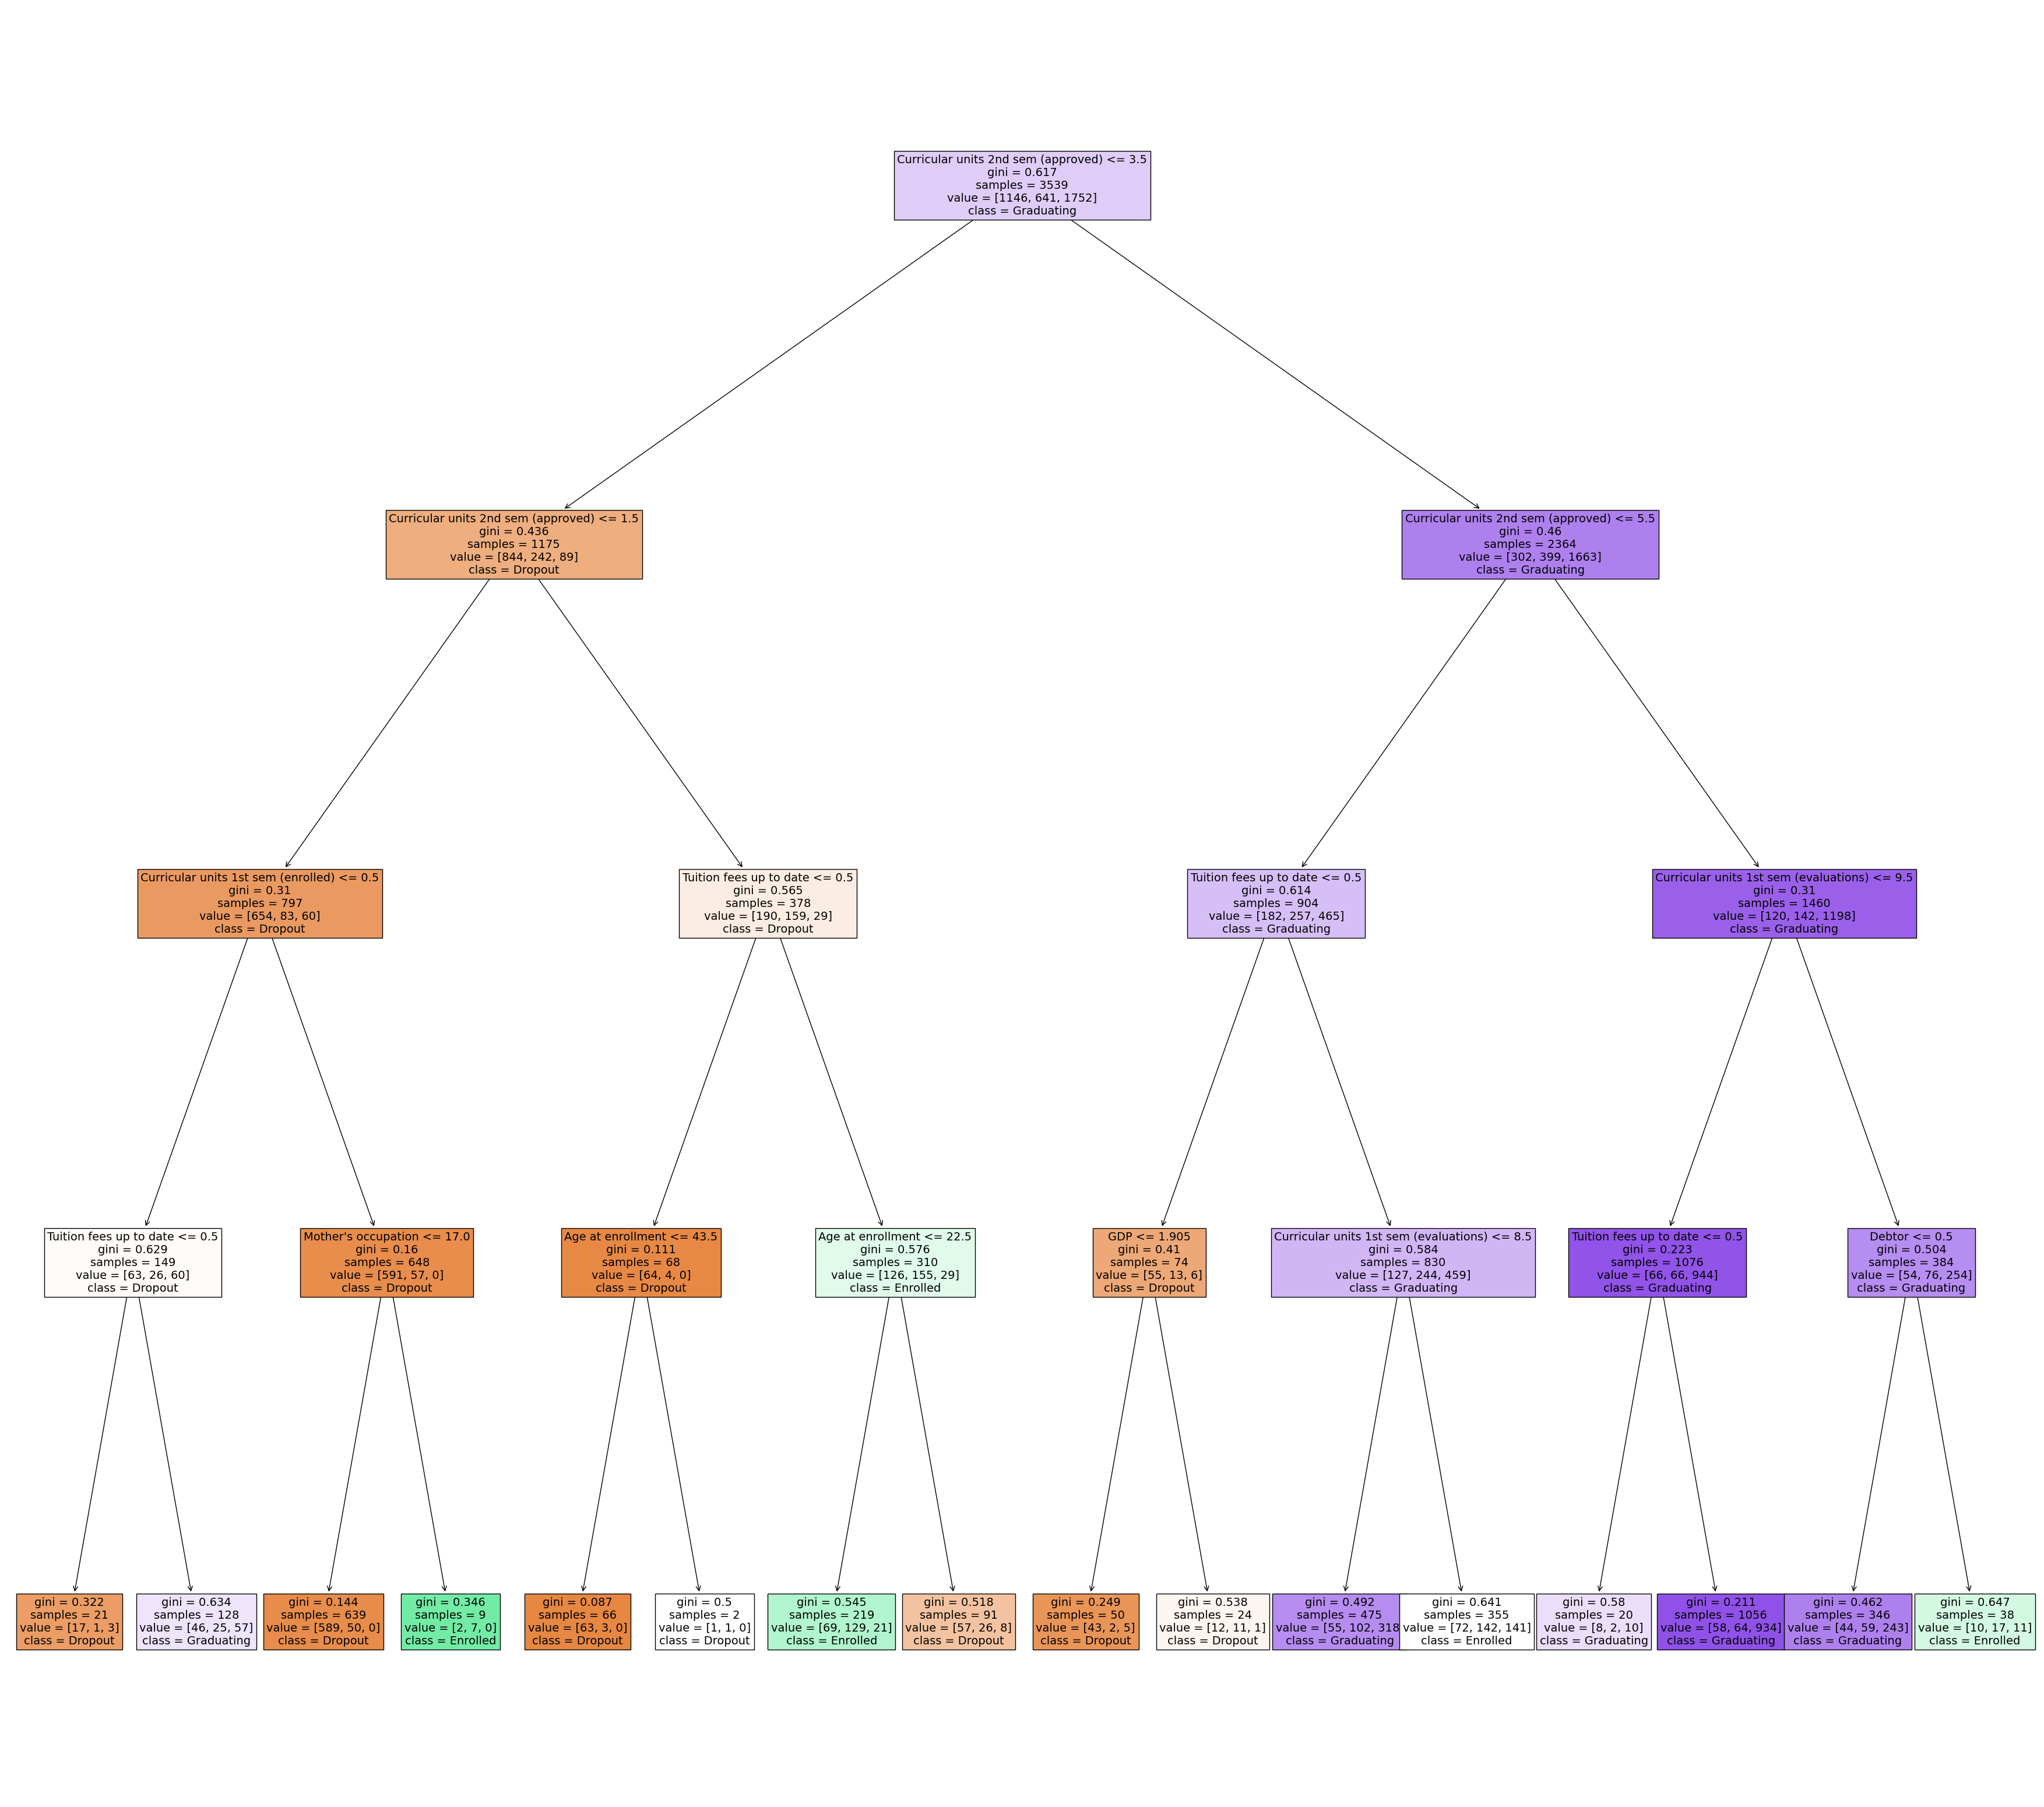

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(45,40))
plot_tree(education, filled=True,fontsize=14,feature_names=x.columns, class_names=['Dropout','Enrolled','Graduating'])
plt.show()

SAVE THE MODEL

In [14]:
import joblib

#Assuming 'education' is your trained DecisionTreeClassifier model
education = DecisionTreeClassifier(random_state=10)
education.fit(x_train, y_train)

#Save the trained model to a file
joblib.dump(education, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

LOAD THE MODEL AND MAKE PREDICTIONS

In [15]:
import joblib
import pandas as pd

#Load the saved model
modelx = joblib.load('decision_tree_model.pkl')

#Prepare your new data with attribute names

newx = pd.DataFrame({
    'Marital status':[1,2,4,3],
    'Application mode':[1,12,16,13],
    'Application order':[6,1,4,5],
    'Course':[15,11,2,15],
    'Daytime/evening attendance':[1,0,0,1],
    'Previous qualification':[14,1,3,1],
    'Nacionality':[15,1,12,14],
    "Mother's qualification":[28,15,27,23],
    "Father's qualification":[21,14,3,22],
    "Mother's occupation":[3,5,12,16],
    "Father's occupation":[10,7,5,6],
    'Displaced':[1,0,1,0],
    'Educational special needs':[0,0,1,0],
    'Debtor':[1,0,1,1],
    'Tuition fees up to date':[0,0,1,1],
    'Gender':[1,0,1,0],
    'Scholarship holder':[0,1,1,1],
    'Age at enrollment':[19,24,40,18],
    'International':[0,1,0,1],
    'Curricular units 1st sem (credited)':[0,0,2,6],
    'Curricular units 1st sem (enrolled)':[0,6,5,0],
    'Curricular units 1st sem (evaluations)':[9,10,0,3],
    'Curricular units 1st sem (approved)':[6,8,10,0],
    'Curricular units 1st sem (grade)':[13.3,0.0,12.25,6.8],
    'Curricular units 1st sem (without evaluations)':[0,1,0,2],
    'Curricular units 2nd sem (credited)':[0,2,7,1],
    'Curricular units 2nd sem (enrolled)':[6,5,8,6],
    'Curricular units 2nd sem (evaluations)':[17,4,10,14],
    'Curricular units 2nd sem (approved)':[15,3,6,10],
    'Curricular units 2nd sem (grade)':[11,4,12,3],
    'Curricular units 2nd sem (without evaluations)':[0,2,1,0],
    'Unemployment rate':[10.1,11.4,3.5,6.8],
    'Inflation rate':[2.8,1.4,2.6,0.6],
    'GDP':[1.74,2.02,3.51,0.32]
    
    
})

#Make predictions on the new data
predictions = modelx.predict(newx)

#Creating a mapping from 0 to 'low' and 1 to 'high'
graduand_mapping = {0: '0-Dropout', 1:'1-Enrolled',2:'2-Graduating'}

#print the predictions with labels
for i, prediction in enumerate(predictions):
    label = graduand_mapping[prediction]
    print(f'Data{i+1}: Predicted Outcome- {label}')

Data1: Predicted Outcome- 1-Enrolled
Data2: Predicted Outcome- 0-Dropout
Data3: Predicted Outcome- 2-Graduating
Data4: Predicted Outcome- 1-Enrolled
